<a href="https://colab.research.google.com/github/2303A52487/GEN-AI/blob/main/GEN_AI_Assignment_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/diabetes.csv')


print(data.head())


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden Layer 1
    Dense(16, activation='relu'),                                    # Hidden Layer 2
    Dense(20, activation='relu'),                                    # Hidden Layer 3
    Dense(10, activation='relu'),                                    # Hidden Layer 4
    Dense(1, activation='sigmoid')                                   # Output Layer (binary classification)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=64, epochs=150, validation_split=0.2)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3207 - loss: 11.4325 - val_accuracy: 0.3902 - val_loss: 6.5417
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3287 - loss: 10.6122 - val_accuracy: 0.3902 - val_loss: 6.5362
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3491 - loss: 10.1461 - val_accuracy: 0.3902 - val_loss: 6.5307
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3460 - loss: 10.8604 - val_accuracy: 0.3902 - val_loss: 6.5251
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3327 - loss: 10.5512 - val_accuracy: 0.3902 - val_loss: 6.5194
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3627 - loss: 10.4864 - val_accuracy: 0.3902 - val_loss: 6.5137
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3504 - loss: 10.6813 - val_accuracy: 0.3902 - val_loss: 6.5079
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3375 - loss: 10.5754 - val_accuracy: 0.3902 - v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Test Accuracy: 0.36


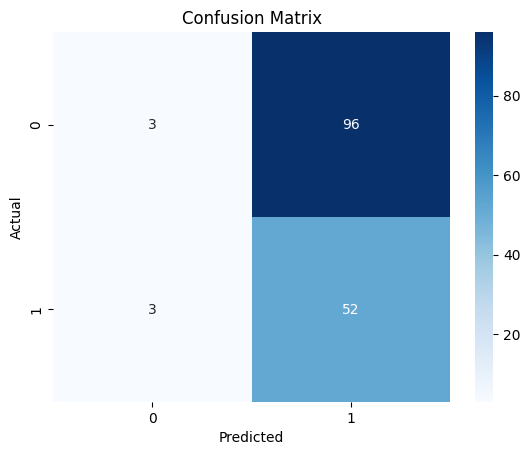

Precision: 0.35
Recall: 0.95
F1 Score: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        99
           1       0.35      0.95      0.51        55

    accuracy                           0.36       154
   macro avg       0.43      0.49      0.28       154
weighted avg       0.45      0.36      0.22       154



In [8]:
y_pred = (model.predict(X_test) > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


print('Classification Report:')
print(classification_report(y_test, y_pred))

In [7]:
model.save('/content/diabetes_ann_model.h5')


loaded_model = keras.models.load_model('/content/diabetes_ann_model.h5')


In [6]:
sample_data = np.array([X_test[0]])

prediction = (loaded_model.predict(sample_data) > 0.5).astype(int)
print(f'Prediction for sample data: {prediction[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Prediction for sample data: 1
